# Verisetini dosyadan okuma
veriseti csv dosyasından çekilir.

verisetinin alındığı adres: https://www.kaggle.com/fedesoriano/heart-failure-prediction

kısaltma anlamları:
1. ChestPainType: göğüs ağrısı türü
2. RestingBP: dinlenme anındaki kan basıncı
3. FastingBS: açlık kan şekeri
4. RestingECG: ECG Testi
5. MaxHR: maksimum kalp atış hızı
6. ExerciseAngina: (?)
7. oldpeak: (?)
8. ST_Slope: (?)
9. HeartDisease: kalp hastalığı

In [1]:
import pandas as pd
heart = pd.read_csv("heart.csv")
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Verilerin Görselleştirilmesi

verilerin okunabilirliğini arttırmak adına grafiklerden yararlanılabilir. Grafik oluşturmak için matplotlib ve seaborn kütüphaneleri kullanılabilir.

([<matplotlib.patches.Wedge at 0x1e062b03748>,
 [Text(-0.1835941114214546, 1.0845705151124876, '1'),
  Text(0.1835941114214547, -1.0845705151124876, '0')],
 [Text(-0.10014224259352068, 0.5915839173340841, '55.3%'),
  Text(0.10014224259352074, -0.5915839173340841, '44.7%')])

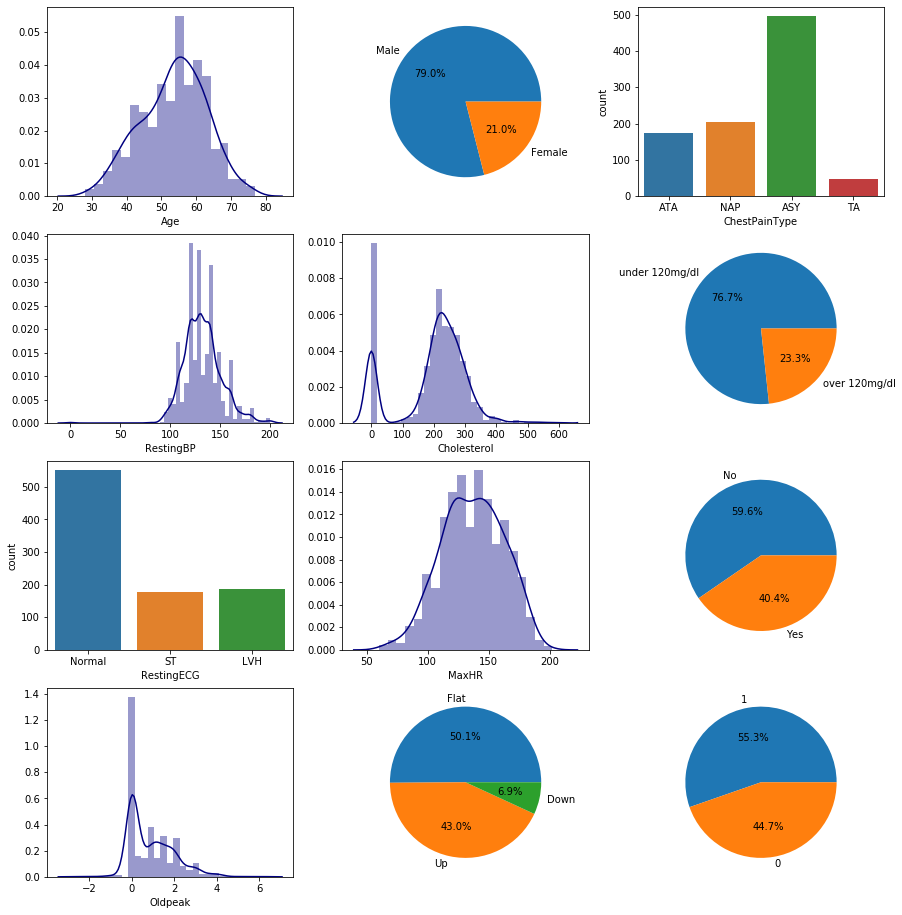

In [2]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.figure(figsize=(15,16))
plt.subplot(4,3,1)
sbn.distplot(heart['Age'],color='navy')
plt.subplot(4,3,2)
plt.pie(heart['Sex'].value_counts(),labels=['Male','Female'],autopct="%.1f%%")
plt.subplot(4,3,3)
sbn.countplot(heart['ChestPainType'])
plt.subplot(4,3,4)
sbn.distplot(heart['RestingBP'],color='navy')
plt.subplot(4,3,5)
sbn.distplot(heart['Cholesterol'],color='navy')
plt.subplot(4,3,6)
plt.pie(heart['FastingBS'].value_counts(),labels=['under 120mg/dl','over 120mg/dl'],autopct="%.1f%%")
plt.subplot(4,3,7)
sbn.countplot(heart['RestingECG'])
plt.subplot(4,3,8)
sbn.distplot(heart['MaxHR'],color='navy')
plt.subplot(4,3,9)
plt.pie(heart['ExerciseAngina'].value_counts(),labels=['No','Yes'],autopct="%.1f%%")
plt.subplot(4,3,10)
sbn.distplot(heart['Oldpeak'],color='navy')
plt.subplot(4,3,11)
plt.pie(heart['ST_Slope'].value_counts(),labels=['Flat','Up','Down'],autopct="%.1f%%")
plt.subplot(4,3,12)
plt.pie(heart['HeartDisease'].value_counts(),labels=[1,0],autopct="%.1f%%")

# Korelasyon
korelasyon 2 veri arasındaki orantıyı ifade eder

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


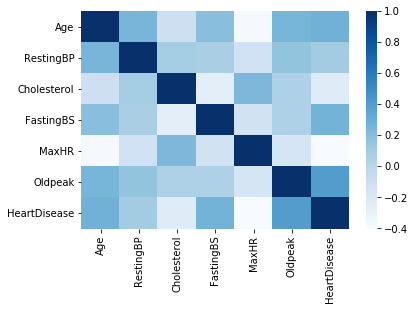

In [3]:
sbn.heatmap(heart.corr(), cmap="Blues")
heart.corr()

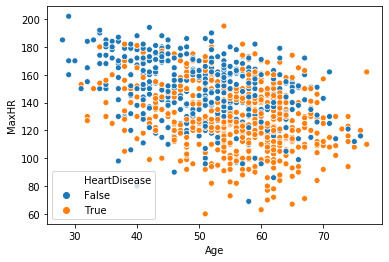

In [4]:
sbn.scatterplot(heart["Age"],heart["MaxHR"], hue= heart["HeartDisease"]==1)

# Yapay Sinir Ağı Nedir

<img src="nn.jpg" width="500" height="600">
<img src="neuron.gif" width="500" height="600">

# Kategorik Değerlerin Sayısal Değerlere Dönüştürülmesi

In [5]:
heart["ST_Slope"].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [6]:
def ekle(data, key):
    unique = data[key].unique()
    for i in unique:
        data[key + "_" + i] = data[key].apply(lambda x: int(x==i))
    data = data.drop(columns=[key])
    return data

In [7]:
heart["Sex"] = heart["Sex"].apply(lambda x: int(x=="M"))
heart.ExerciseAngina = heart.ExerciseAngina.apply(lambda x: int(x=='Y'))

heart = ekle(heart, "ChestPainType")
heart = ekle(heart, "RestingECG")
heart = ekle(heart, "ST_Slope")
heart.head(20)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_ASY,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,RestingECG_LVH,ST_Slope_Up,ST_Slope_Flat,ST_Slope_Down
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,1,0,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,1,0,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,1,0,0
3,48,0,138,214,0,108,1,1.5,1,0,0,1,0,1,0,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,1,0,0
5,39,1,120,339,0,170,0,0.0,0,0,1,0,0,1,0,0,1,0,0
6,45,0,130,237,0,170,0,0.0,0,1,0,0,0,1,0,0,1,0,0
7,54,1,110,208,0,142,0,0.0,0,1,0,0,0,1,0,0,1,0,0
8,37,1,140,207,0,130,1,1.5,1,0,0,1,0,1,0,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,1,0,0,0,1,0,0,1,0,0


In [8]:
heart.corr().HeartDisease.sort_values()

ST_Slope_Up         -0.622164
ChestPainType_ATA   -0.401924
MaxHR               -0.400421
Cholesterol         -0.232741
ChestPainType_NAP   -0.212964
RestingECG_Normal   -0.091580
ChestPainType_TA    -0.054790
RestingECG_LVH       0.010670
RestingECG_ST        0.102527
RestingBP            0.107589
ST_Slope_Down        0.122527
FastingBS            0.267291
Age                  0.282039
Sex                  0.305445
Oldpeak              0.403951
ExerciseAngina       0.494282
ChestPainType_ASY    0.516716
ST_Slope_Flat        0.554134
HeartDisease         1.000000
Name: HeartDisease, dtype: float64

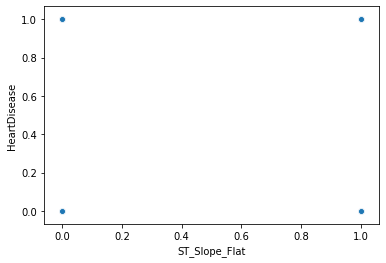

In [9]:
sbn.scatterplot(x="ST_Slope_Flat", y="HeartDisease", data=heart)

In [10]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
Sex,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
ExerciseAngina,918.0,0.404139,0.490992,0.0,0.00,0.0,1.0,1.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
ChestPainType_ATA,918.0,0.188453,0.391287,0.0,0.00,0.0,0.0,1.0


# Null olan değerlerin çıkartılması
eğer null değerle karşılaşırsak onları çıkartmamız gerekmektedir. bizim verisetimizde bu tarz bir değer olmadığı için bu işlemi es geçebiliriz.

In [11]:
#isnull() ve dropna()
heart.isnull().sum()

Age                  0
Sex                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
ExerciseAngina       0
Oldpeak              0
HeartDisease         0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_ASY    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
RestingECG_LVH       0
ST_Slope_Up          0
ST_Slope_Flat        0
ST_Slope_Down        0
dtype: int64

#  Giriş ve çıkış verilerinin hazırlanması

X değişkeni yapay sinir ağı modeline verilecek olan girdi değerlerini tutacak olan değişkendir.

Y değişkeni ise modelin çıktı olarak vermesi gereken değerlerdir.

In [12]:
Y = heart.HeartDisease.values
X = heart.drop(columns=["HeartDisease"]).values
# X = heart.loc[:,['Age', 'MaxHR','Sex']].values

# Train ve Test verilerinin ayrılması
Train verileri modelin eğitimi için test verileri modelin test edilmesi için ayrılır

* Ayrılan verilerin karışık şekilde dizilmesi gerekmektedir.
* istenen takdirde test verisinin değeri değiştirilebilir. test verisinin büyüklüğünü modelin doğruluğuna bakarak karar verebilirsiniz.

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=1/3, random_state=42)

In [14]:
print(len(x_train), len(x_test))

612 306


# Verilerin 0-1 değer aralığına indirilmesi

Yapay zeka modelinin giriş değeri olarak alacağı değerler 0 ile 1 değeri arasında olması gerekir. x değerlerimizi aşağıdaki fonksiyonları kullanarak bu değer aralığına alabiliriz.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)
x_train.shape[1]

18

# Modelin oluşturulması
Bir model katmanlardan oluşmaktadır. İlk katmanımız girdi değerlerimizin olacağı inputlayer olacaktır. Bu kısımda input_shape parametresi girdi özellikleri adedi kadar olmalıdır. 

modele eklenecek sonraki katmanlar iç(gizli) katmanlar olarak isimlendirilmektedir. içlerinde bulunacak nöron sayısı ve kaç tane katman olacağına kullanıcı karar verebilir. Kullanıcı bu kararı moelin doğruluğuna göre verebilir.

Modele son olarak çıktı değerlerinin sayısı kadar nöron bulunduran son katman eklenir. Bu eğitimde çıktı olarak tek bir değerin tahmin edilmesi gerektiğinden tek bir nöron bu katman için yeterli olmaktadır.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras import optimizers

In [17]:
#modeli istediğiniz gibi oluşturabilirsiniz
model = Sequential()

model.add(InputLayer(input_shape=x_train.shape[1]))

model.add(Dense(120, activation="relu"))
model.add(Dense(120, activation="relu"))
model.add(Dense(120, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="Adam", loss="mse")

# SGD
# RMSprop
# Adam
# Adadelta
# Adagrad
# Adamax
# Nadam
# Ftrl

# Model Eğitimi 

Model eğitiminde kullanılacak metoda test ve train verileri aşağıdaki gibi eklenir. batch_size ve epoch değerleri eğitim verileri kadar önemlidir. Epoch değeri eğitimin kaç iterasyon çalıştırılacağını belirler. Loss değerlerine bakılarak epoch değeri değiştirilebilir.  

In [18]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=400, epochs=40)

Epoch 1/40
2/2 [==============================] - 1s 360ms/step - loss: 0.5445 - val_loss: 0.3276
Epoch 2/40
2/2 [==============================] - 0s 38ms/step - loss: 0.2730 - val_loss: 0.2045
Epoch 3/40
2/2 [==============================] - 0s 37ms/step - loss: 0.2053 - val_loss: 0.1884
Epoch 4/40
2/2 [==============================] - 0s 109ms/step - loss: 0.2146 - val_loss: 0.1669
Epoch 5/40
2/2 [==============================] - 0s 41ms/step - loss: 0.1928 - val_loss: 0.1360
Epoch 6/40
2/2 [==============================] - 0s 41ms/step - loss: 0.1486 - val_loss: 0.1287
Epoch 7/40
2/2 [==============================] - 0s 39ms/step - loss: 0.1304 - val_loss: 0.1423
Epoch 8/40
2/2 [==============================] - 0s 36ms/step - loss: 0.1290 - val_loss: 0.1521
Epoch 9/40
2/2 [==============================] - 0s 42ms/step - loss: 0.1279 - val_loss: 0.1448
Epoch 10/40
2/2 [==============================] - 0s 39ms/step - loss: 0.1263 - val_loss: 0.1257
Epoch 11/40
2/2 [==========

# Loss değerlerinin gösterilmesi 

loss değeri en az değeri almalı ve val_loss değeri loss değerine yakın olmalıdır. Bu değeri sağlayan modellerin doğruluğu daha yüksektir denilebilir.

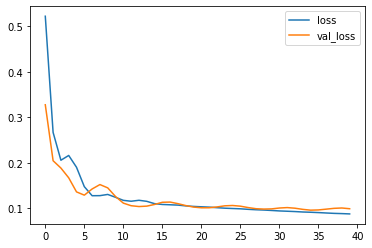

In [19]:
loss = pd.DataFrame(model.history.history)
loss.plot()

# Veri tahmin işlemi

Modelimize test verilerini vererek çıktı değerlerini tahmin etmesini sağlıyoruz.

In [20]:
pred = model.predict(x_test)
pred

array([[ 2.05121711e-02],
       [ 4.52359170e-01],
       [ 1.01840293e+00],
       [ 9.73133802e-01],
       [ 8.04591998e-02],
       [ 8.47528219e-01],
       [ 6.71574771e-01],
       [ 2.69165695e-01],
       [ 7.33549535e-01],
       [ 9.99793768e-01],
       [ 4.12230521e-01],
       [ 2.71712214e-01],
       [ 5.41514456e-01],
       [ 8.32636878e-02],
       [ 7.85849512e-01],
       [ 6.69767976e-01],
       [-2.00690292e-02],
       [ 8.06284487e-01],
       [ 7.82087088e-01],
       [ 1.59893587e-01],
       [ 3.85569006e-01],
       [ 8.33785057e-01],
       [ 1.71330981e-02],
       [ 5.29665709e-01],
       [ 9.14952397e-01],
       [ 8.98713708e-01],
       [ 4.03885357e-02],
       [ 5.64461827e-01],
       [ 7.65342191e-02],
       [ 3.68559845e-02],
       [ 7.94248104e-01],
       [ 8.91947672e-02],
       [ 2.65204370e-01],
       [ 9.36829746e-01],
       [ 8.89273226e-01],
       [ 3.35320354e-01],
       [ 9.35463905e-01],
       [ 5.85077554e-02],
       [ 9.1

# Sonuçların görselleştirilmesi 

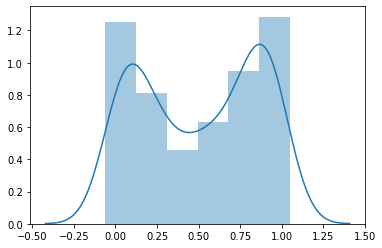

In [21]:
sbn.distplot(pd.DataFrame(pred)[0].values)

In [22]:
predicted = (pd.DataFrame(pred)[0]>0.5).astype(int)
predicted

0      0
1      0
2      1
3      1
4      0
      ..
301    0
302    1
303    1
304    0
305    1
Name: 0, Length: 306, dtype: int32

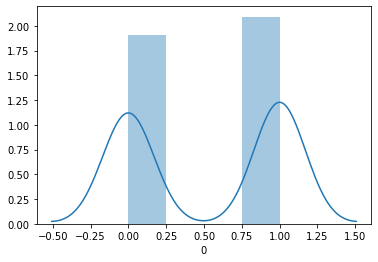

In [23]:
sbn.distplot(predicted)

In [24]:
(predicted==y_test).sum()/len(predicted)

0.869281045751634

Text(0, 0.5, 'predicted')

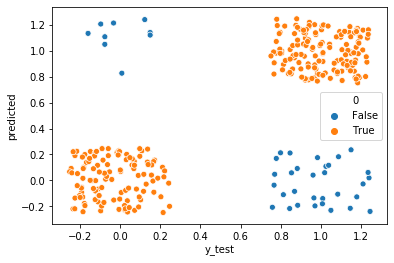

In [25]:
import numpy as np
# sbn.scatterplot(
#     y_test,
#     predicted,
#     hue = (predicted==y_test)
# )
sbn.scatterplot(
    y_test + np.random.rand(len(y_test))*0.5-0.25,
    predicted + np.random.rand(len(y_test))*0.5-0.25,
    hue = (predicted==y_test)
)
plt.xlabel("y_test")
plt.ylabel("predicted")

[[115  31]
 [  9 151]]


Text(33.0, 0.5, 'predicted')

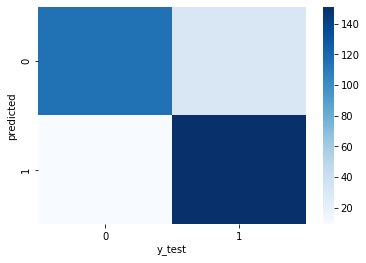

In [26]:
heat = np.array([
    [(predicted == y_test)[predicted == 0].sum(), (predicted != y_test)[predicted == 0].sum()],
    [(predicted != y_test)[predicted == 1].sum(), (predicted == y_test)[predicted == 1].sum()]
])
print(heat)
sbn.heatmap(heat, cmap="Blues")
plt.xlabel("y_test")
plt.ylabel("predicted")

# Modelin kaydedilmesi 

Model daha sonra kullanılmak üzere kaydedilebilir.

In [27]:
model.save("heart")

INFO:tensorflow:Assets written to: heart\assets


In [28]:
import tensorflow.keras.models
newModel = tensorflow.keras.models.load_model("heart")